# Mathematics

In [ ]:
import torch
import numpy as np
import scipy.stats as stats

import sympy as sym

import plotly.graph_objects as go
from plotly.io import renderers
renderers.default = 'png'
from plotly.subplots import make_subplots

from pprint import pprint
from utils.design import plotly_main_layout, plotly_main_subplot_layout

___
### Transposition

- $A^\text{T}_{(m,n)} = A_{(n,m)}$
    - $A$: matrix

In [2]:
tv = torch.tensor([
    [1,2,3,4],
    [5,6,7,8],
    [4,3,2,1],
])

tv.T

tensor([[1, 5, 4],
        [2, 6, 3],
        [3, 7, 2],
        [4, 8, 1]])

___
### Products

- Dot: $a \cdot b=\left<a,b\right> = a^\text{T} b = \sum_{i=1}^{n}a_i b_i$
- Matrix: $A_{(m,k)} \times B_{(k,n)} = C_{(m,n)}$
    - $A$: matrix
    - $B$: matrix

In [3]:
tv1 = torch.randn(5,4)
tv2 = torch.randn(4,5)

dot_product = torch.dot(tv1[0], tv2.T[1])
print('Dot:')
pprint(dot_product)

matrix_product = torch.mm(tv1, tv2)
print('\nMatrix:')
pprint(matrix_product)

Dot:
tensor(1.2497)

Matrix:
tensor([[ 0.4603,  1.2497,  6.9297,  4.0594,  4.4670],
        [ 1.0745, -3.2758,  2.4205,  1.3952, -1.8767],
        [ 0.5144,  1.5488,  1.1351, -1.1788,  1.6082],
        [-0.7651,  5.1185, -0.0949, -2.1309,  0.2688],
        [-0.8354,  2.3495,  2.7479,  2.7481,  2.7040]])


___
### Softmax

- $\sigma_i=\dfrac{e^{z_i}}{\sum e^z}$
    - $z$: categories

In [4]:
def softmax(z):
    e_z = [np.exp(x) for x in z]
    sum_e_z = sum(e_z)
    sigma = [round(float(x/sum_e_z),3) for x in e_z]
    return sigma

z = [1,2,3]
print('z =', z)
print('sigma =', softmax(z))

z = [1, 2, 3]
sigma = [0.09, 0.245, 0.665]


In [5]:
softfun = torch.nn.Softmax(dim=0)
z = torch.Tensor(z)

print('z =', z)
print('sigma =', softfun(z))

z = tensor([1., 2., 3.])
sigma = tensor([0.0900, 0.2447, 0.6652])


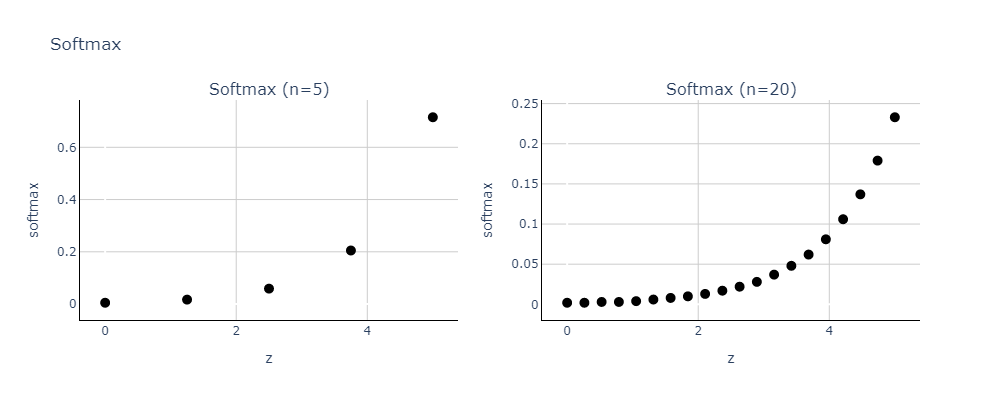

In [6]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=['Softmax (n=5)', 'Softmax (n=20)'],
)

z_1 = np.linspace(0, 5, 5)
fig.add_trace(go.Scatter(
    x=z_1, y=softmax(z_1), showlegend=False,
    mode='markers', marker=dict(size=10, color='black'),
), row=1, col=1)

z_1 = np.linspace(0, 5, 20)
fig.add_trace(go.Scatter(
    x=z_1, y=softmax(z_1), showlegend=False,
    mode='markers', marker=dict(size=10, color='black'),
), row=1, col=2)

plotly_main_subplot_layout(fig, title='Softmax', y='softmax', x='z', width=1000, height=400)
fig.show()

___
### Entropy and Cross-Entropy

- $H=-\sum_{i=1}^{n} p(x_i) \log_2(p(x_i))$
    - $x$: data values
    - $p$: probability
    - Unit: bits
    - **High Entropy** indicates that the dataset has a lot variability, while 
    - **Low Entropy** assumes most of the values repeat and, therefore, are redundant
    
- $H(p,q)=-\sum p \log(q)$
    - **Cross-Entropy** describes the relationship between two probability distributions

In [7]:
p = 0.25
q = 1-p

H = 0
for x in [p, q]:
    H -= x*np.log(x)

print(f'Entropy = {H:.3}')

Entropy = 0.562


In [8]:
p = [1, 0]
q = [0.25, 0.75]

H = 0
for i in range(len(p)):
    H -= p[i]*np.log(q[i])

print(f'Cross-Entropy = {H:.3}')

Cross-Entropy = 1.39


In [9]:
q = torch.Tensor(q)
p = torch.Tensor(p)

# The order matters. P needs to be the labels and Q the probabilities
cross_entropy = torch.nn.functional.binary_cross_entropy(q,p)

print(f'Cross-Entropy =', cross_entropy)

Cross-Entropy = tensor(1.3863)


___
### Min, Max and Args

- $z = \underset{x}{\arg\max} \, f(x)$

In [10]:
t = torch.Tensor([1, -1, 3, 0 , 4, 3])

print(f't[{torch.argmin(t)}] | min = {torch.min(t)}')
print(f't[{torch.argmax(t)}] | max = {torch.max(t)}')

t[1] | min = -1.0
t[4] | max = 4.0


In [11]:
t = torch.Tensor([
    [0, 1, 10],
    [20, 8, 5]
])

print('rows arg min:')
print(torch.min(t, axis=0))

rows arg min:
torch.return_types.min(
values=tensor([0., 1., 5.]),
indices=tensor([0, 0, 1]))


___
### T-Test

- $\dfrac{\bar{x} - \bar{y}}{s \, \sqrt{n}}$
    - $\bar{x}$: mean model 1
    - $\bar{y}$: mean model 2
    - $s$: standard deviation
    - $n$: number of samples

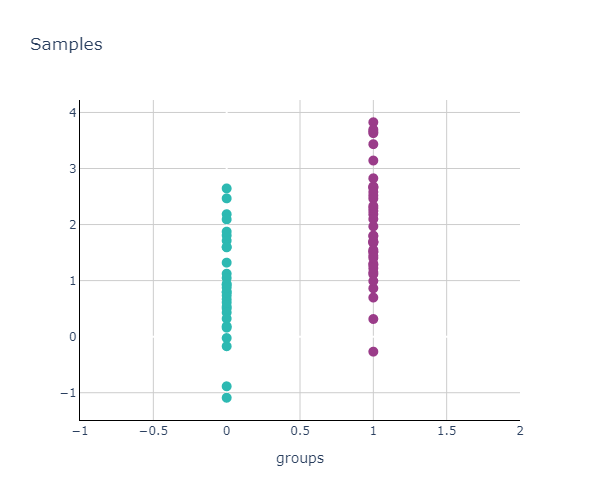

In [12]:
n1 = 30
n2 = 40
mu1 = 1
mu2 = 2

data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x = np.zeros(n1), y=data1, showlegend=False,
    mode='markers', marker=dict(color='#2db9b2', size=10)
))

fig.add_trace(go.Scatter(
    x = np.ones(n2), y=data2, showlegend=False,
    mode='markers', marker=dict(color='#9a3c89', size=10)
))

plotly_main_layout(fig, title='Samples', x='groups', x_range=[-1,2], width=600, height=500)

In [13]:
t, p = stats.ttest_ind(data1, data2)
print(f't = {t:.5}')
print(f'p = {p:.5}')

t = -4.7206
p = 1.2166e-05


___
### Derivatives

- $f(x)' = \dfrac{\text{d}y}{\text{d}x}$

In [16]:
x = sym.symbols('x')
fx = 2*(x**2)

df = sym.diff(fx,x)

print(f'f(x) = {fx}')
print(f'f(x) = {df}')

f(x) = 2*x**2
f(x) = 4*x
